In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('D:\\downloads\\Bengaluru_House_Data.csv')

In [3]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [6]:
df.drop(['availability','society','balcony'],axis='columns',inplace=True)

In [7]:
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df.shape

(13320, 6)

In [9]:
df.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df.groupby('area_type').count()

,location,size,total_sqft,bath,price
area_type,,,,,
Built-up Area,2418,2418,2418,2410,2418
Carpet Area,87,87,87,87,87
Plot Area,2025,2009,2025,2009,2025
Super built-up Area,8789,8790,8790,8741,8790


In [11]:
new_bath=df.bath.median()

In [12]:
df['bath']=df.bath.fillna(new_bath)

In [13]:
df.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [14]:
df2=df.dropna()

In [15]:
df2.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df2.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
def bdrm (stng):
    new=stng.split(' ')
    return int(new[0])
    

In [19]:
bdrm ('20 bedroom')

20

In [20]:
bdrm('27 BHK')

27

In [21]:
df2['BHK']=df2['size'].apply(bdrm)

C:\Users\Saurabh\AppData\Local\Temp/ipykernel_17900/2795308544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(bdrm)


In [22]:
df2.drop('size',axis='columns',inplace=True)

C:\Users\Saurabh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df2.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2


In [24]:
df2[df2.BHK>=20]

,area_type,location,total_sqft,bath,price,BHK
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,2400,40.0,660.0,43


In [25]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
type(df2.total_sqft[0])

str

In [27]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [28]:
is_float(2562)

True

In [29]:
is_float('232')

True

In [30]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
56,Built-up Area,Devanahalli,3010 - 3410,2.0,192.000,4
81,Built-up Area,Hennur Road,2957 - 3450,2.0,224.500,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2
224,Super built-up Area,Devanahalli,1520 - 1740,2.0,74.820,3
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,63.770,2


In [31]:

def area (stng):
    new=stng.split('-')
    if len(new)==2:
         return (float(new[0])+float(new[1]))/2
    try:
        return float(stng)
    except:
        return None
    
       
    

In [32]:
area('12-36')

24.0

In [33]:
area('676')

676.0

In [34]:
area('345mtr')

In [35]:
area('11.2-23.22')

17.21

In [36]:
df2['Area']=df2['total_sqft'].apply(area)

C:\Users\Saurabh\AppData\Local\Temp/ipykernel_17900/2537635430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Area']=df2['total_sqft'].apply(area)


In [37]:
df2.head()

,area_type,location,total_sqft,bath,price,BHK,Area
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,1200,2.0,51.00,2,1200.0


In [38]:
df2.iloc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft             2100 - 2850
bath                           4.0
price                        186.0
BHK                              4
Area                        2475.0
Name: 30, dtype: object

In [39]:
df2.isna().sum()

area_type      0
location       0
total_sqft     0
bath           0
price          0
BHK            0
Area          46
dtype: int64

In [40]:
df3=df2.dropna()

In [41]:
df3.drop('total_sqft',axis='columns',inplace=True)

C:\Users\Saurabh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
df3.head()

,area_type,location,bath,price,BHK,Area
0,Super built-up Area,Electronic City Phase II,2.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,51.00,2,1200.0


In [43]:
df3['price_per_sqft']=(df3['price']*100000)/df3['Area']

C:\Users\Saurabh\AppData\Local\Temp/ipykernel_17900/3988158694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_per_sqft']=(df3['price']*100000)/df3['Area']


In [44]:
df3.head()

,area_type,location,bath,price,BHK,Area,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [45]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [46]:
len(df3.location.unique())

1298

In [47]:
df3.location=df3.location.apply(lambda a: a.strip())

C:\Users\Saurabh\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
loct_analysis=df3.value_counts('location')

In [51]:
loc_analysis=df3.groupby('location')['location'].count().sort_values(ascending=False)
loc_analysis

location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [53]:
loct_analysis[loct_analysis<=10]

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Length: 1047, dtype: int64

In [54]:
(loc_analysis[loc_analysis<=10])

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [55]:
len(loc_analysis[loc_analysis<=10])

1047

In [56]:
less_than10=loc_analysis[loc_analysis<=10]


In [57]:
less_than10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [52]:
len(df3.location.unique())

1287

In [58]:
df3['location']=df3.location.apply(lambda y: 'other' if y in less_than10 else y )

C:\Users\Saurabh\AppData\Local\Temp/ipykernel_17900/3798491994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['location']=df3.location.apply(lambda y: 'other' if y in less_than10 else y )


In [60]:
len(df3.location.unique())

241

In [61]:
df3.head()

,area_type,location,bath,price,BHK,Area,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [62]:
### outlier detection ###

In [63]:
df3.shape

(13257, 7)

In [64]:
df3[(df3.Area/df3.BHK)<300].head()

,area_type,location,bath,price,BHK,Area,price_per_sqft
9,Plot Area,other,6.0,370.0,6,1020.0,36274.509804
45,Plot Area,HSR Layout,9.0,200.0,8,600.0,33333.333333
58,Plot Area,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810
68,Plot Area,Devarachikkanahalli,7.0,85.0,8,1350.0,6296.296296
70,Plot Area,other,3.0,100.0,3,500.0,20000.000000


In [65]:
df4=df3[~(df3.Area/df3.BHK<300)]

In [66]:
df4.shape

(12513, 7)

In [67]:
df4.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [76]:
def remove_pps_outlier(df):
    df_final=pd.DataFrame()
    for keys,subdf in df4.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>=(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_final=pd.concat([df_final,reduced_df],axis='rows',ignore_index=True)
    return df_final   
        

    
    

In [77]:
df5= remove_pps_outlier(df4)

In [78]:
df5.shape

(10288, 7)

In [79]:
df5.head()

,area_type,location,bath,price,BHK,Area,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,2.0,235.0,3,1875.0,12533.333333
3,Built-up Area,1st Block Jayanagar,2.0,130.0,3,1200.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,2.0,148.0,2,1235.0,11983.805668


In [80]:
df5.shape[1]

7

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
def plot_scatter(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.scatter(bhk2.Area,bhk2.price_per_sqft,color='red',marker='+',label='BHK 2')
    plt.scatter(bhk3.Area,bhk3.price_per_sqft,color='blue',marker='d',label='BHK 3')
    plt.xlabel('Area')
    plt.ylabel('pp_sqft')
    plt.title(location)
    plt.legend()

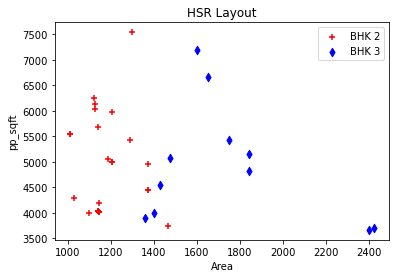

In [83]:
plot_scatter(df5,'HSR Layout')

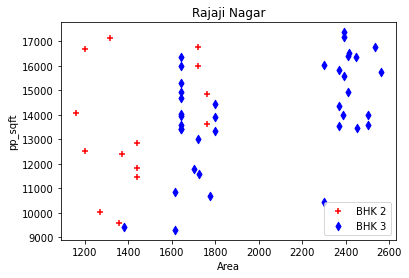

In [84]:
plot_scatter(df5,'Rajaji Nagar')

In [85]:
def bhk_outlliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
                bhk_stats[bhk]={'mean':np.mean(bhk_df.price_per_sqft),
                               'std':np.std(bhk_df.price_per_sqft),
                               'count':bhk_df.shape[0]}
        for  bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')    


In [86]:
df6=bhk_outlliers(df5)

In [87]:
df6.head()

,area_type,location,bath,price,BHK,Area,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,2.0,235.0,3,1875.0,12533.333333
3,Built-up Area,1st Block Jayanagar,2.0,130.0,3,1200.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,2.0,148.0,2,1235.0,11983.805668


In [88]:
df6.shape

(7342, 7)

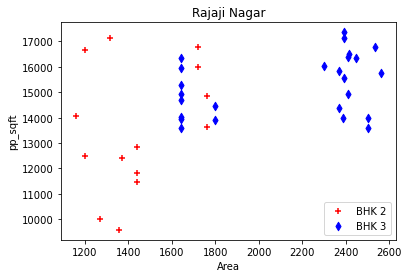

In [89]:
plot_scatter(df6,'Rajaji Nagar')

Text(0, 0.5, 'count of houses')

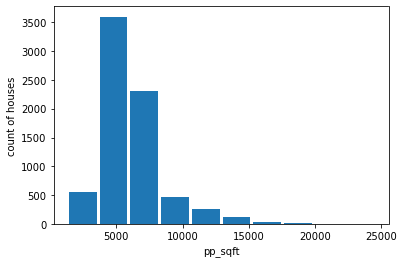

In [90]:
plt.hist(df6.price_per_sqft,rwidth=0.9)
plt.xlabel('pp_sqft')
plt.ylabel('count of houses')

In [91]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [92]:
df6[df6.bath>10]

,area_type,location,bath,price,BHK,Area,price_per_sqft
5306,Super built-up Area,Neeladri Nagar,12.0,160.0,10,4000.0,4000.000000
8527,Super built-up Area,other,12.0,525.0,10,12000.0,4375.000000
8616,Super built-up Area,other,16.0,550.0,16,10000.0,5500.000000
9351,Super built-up Area,other,12.0,150.0,11,6000.0,2500.000000
9682,Super built-up Area,other,13.0,275.0,13,5425.0,5069.124424


Text(0, 0.5, 'count')

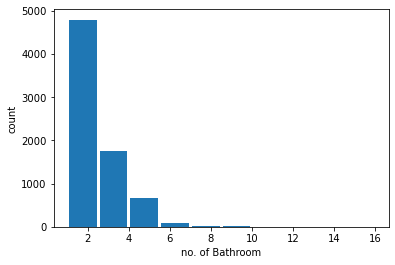

In [83]:
plt.hist(x3.bath,rwidth=0.9)
plt.xlabel('no. of Bathroom')
plt.ylabel('count')

In [84]:
x3[x3.bath>x3.BHK+2]

,area_type,location,bath,price,BHK,Area,price_per_sqft
1634,Built-up Area,Chikkabanavar,7.0,80.0,4,2460.0,3252.032520
5267,Built-up Area,Nagasandra,8.0,450.0,4,7000.0,6428.571429
6748,Super built-up Area,Thanisandra,6.0,116.0,3,1806.0,6423.034330
8452,Super built-up Area,other,9.0,1000.0,6,11338.0,8819.897689


In [93]:
df7=df6[df6.bath<df6.BHK+2]
df7.shape

(7264, 7)

In [94]:
df7.drop('price_per_sqft',axis='columns',inplace=True)

C:\Users\Saurabh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [95]:
df7.head()

,area_type,location,bath,price,BHK,Area
0,Super built-up Area,1st Block Jayanagar,4.0,428.0,4,2850.0
1,Super built-up Area,1st Block Jayanagar,3.0,194.0,3,1630.0
2,Super built-up Area,1st Block Jayanagar,2.0,235.0,3,1875.0
3,Built-up Area,1st Block Jayanagar,2.0,130.0,3,1200.0
4,Super built-up Area,1st Block Jayanagar,2.0,148.0,2,1235.0


In [96]:
dmm=pd.get_dummies(data=df7,columns=['area_type','location'],drop_first=True)

In [97]:
dmm.head()

,bath,price,BHK,Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,4.0,428.0,4,2850.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X=dmm.drop('price',axis='columns')

In [99]:
Y=dmm.price

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)